# Comprehensive Variable Analysis
## Student Habits vs Academic Performance Dataset

### Topics Explored:
- Descriptive statistics: mean, median, mode, standard deviation, min/max
- Distribution assessment: histograms, normality tests (Shapiro-Wilk), skewness, kurtosis
- Outlier detection: boxplots, z-scores (±3 SD)
- Missing value analysis
- Categorical variable frequency analysis
- Correlation analysis for relationships between variables

In [60]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro, normaltest, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Data Loading and Initial Inspection

In [ ]:
# Load the dataset from local directory
# Note: keep_default_na=False prevents pandas from treating "None" string as missing
# We explicitly define what should be treated as NA via na_values parameter
df = pd.read_csv('/Users/jje/src/Stats500FinalProject/data/student_habits_performance.csv', keep_default_na=False)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 16)

First 5 rows:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [79]:
# Display data types and basic info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality            

## 2. Missing Value Analysis

In [80]:
# Missing value analysis
missingData = pd.DataFrame({
    'missingCount': df.isnull().sum(),
    'missingPercentage': (df.isnull().sum() / len(df)) * 100
})
missingData = missingData[missingData['missingCount'] > 0].sort_values('missingCount', ascending=False)

if len(missingData) > 0:
    print("Missing Values Summary:")
    print(missingData)
else:
    print("No missing values detected in the dataset.")

No missing values detected in the dataset.


## 3. Variable Classification

In [81]:
# Classify variables by type
numericVars = df.select_dtypes(include=[np.number]).columns.tolist()
categoricalVars = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID variable from analysis
if 'student_id' in numericVars:
    numericVars.remove('student_id')
if 'student_id' in categoricalVars:
    categoricalVars.remove('student_id')

print("Variable Classification:")
print(f"\nNumeric Variables ({len(numericVars)}):")
for var in numericVars:
    print(f"  - {var}")

print(f"\nCategorical Variables ({len(categoricalVars)}):")
for var in categoricalVars:
    print(f"  - {var}")

Variable Classification:

Numeric Variables (9):
  - age
  - study_hours_per_day
  - social_media_hours
  - netflix_hours
  - attendance_percentage
  - sleep_hours
  - exercise_frequency
  - mental_health_rating
  - exam_score

Categorical Variables (6):
  - gender
  - part_time_job
  - diet_quality
  - parental_education_level
  - internet_quality
  - extracurricular_participation


## 4. Descriptive Statistics for Numeric Variables

The following values for the dataset will be explored:
- Central tendency: Mean, Median, Mode
- Dispersion: Standard Deviation, Variance, Range, IQR
- Distribution shape: Skewness, Kurtosis
- Extreme values: Min, Max, Quartiles

In [82]:
# Comprehensive descriptive statistics
descStats = df[numericVars].describe().T

# Add additional statistics
descStats['variance'] = df[numericVars].var()
descStats['skewness'] = df[numericVars].skew()
descStats['range'] = descStats['max'] - descStats['min']
descStats['IQR'] = descStats['75%'] - descStats['25%']

# Reorder columns for better readability
columnOrder = ['count', 'mean', '50%', 'std', 'variance', 'min', '25%', '75%', 'max', 
                'range', 'IQR', 'skewness']
descStats = descStats[columnOrder]
descStats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Q1', 
                       'Q3', 'Max', 'Range', 'IQR', 'Skewness']

print("Comprehensive Descriptive Statistics:")
print(descStats.round(3))

Comprehensive Descriptive Statistics:
                        Count    Mean  Median  Std Dev  Variance   Min  \
age                    1000.0  20.498    20.0    2.308     5.327  17.0   
study_hours_per_day    1000.0   3.550     3.5    1.469     2.158   0.0   
social_media_hours     1000.0   2.506     2.5    1.172     1.375   0.0   
netflix_hours          1000.0   1.820     1.8    1.075     1.156   0.0   
attendance_percentage  1000.0  84.132    84.4    9.399    88.346  56.0   
sleep_hours            1000.0   6.470     6.5    1.226     1.504   3.2   
exercise_frequency     1000.0   3.042     3.0    2.025     4.102   0.0   
mental_health_rating   1000.0   5.438     5.0    2.848     8.108   1.0   
exam_score             1000.0  69.602    70.5   16.889   285.224  18.4   

                           Q1      Q3    Max  Range     IQR  Skewness  
age                    18.750  23.000   24.0    7.0   4.250     0.008  
study_hours_per_day     2.600   4.500    8.3    8.3   1.900     0.054  
socia

## 5. Distribution Analysis for Numeric Variables

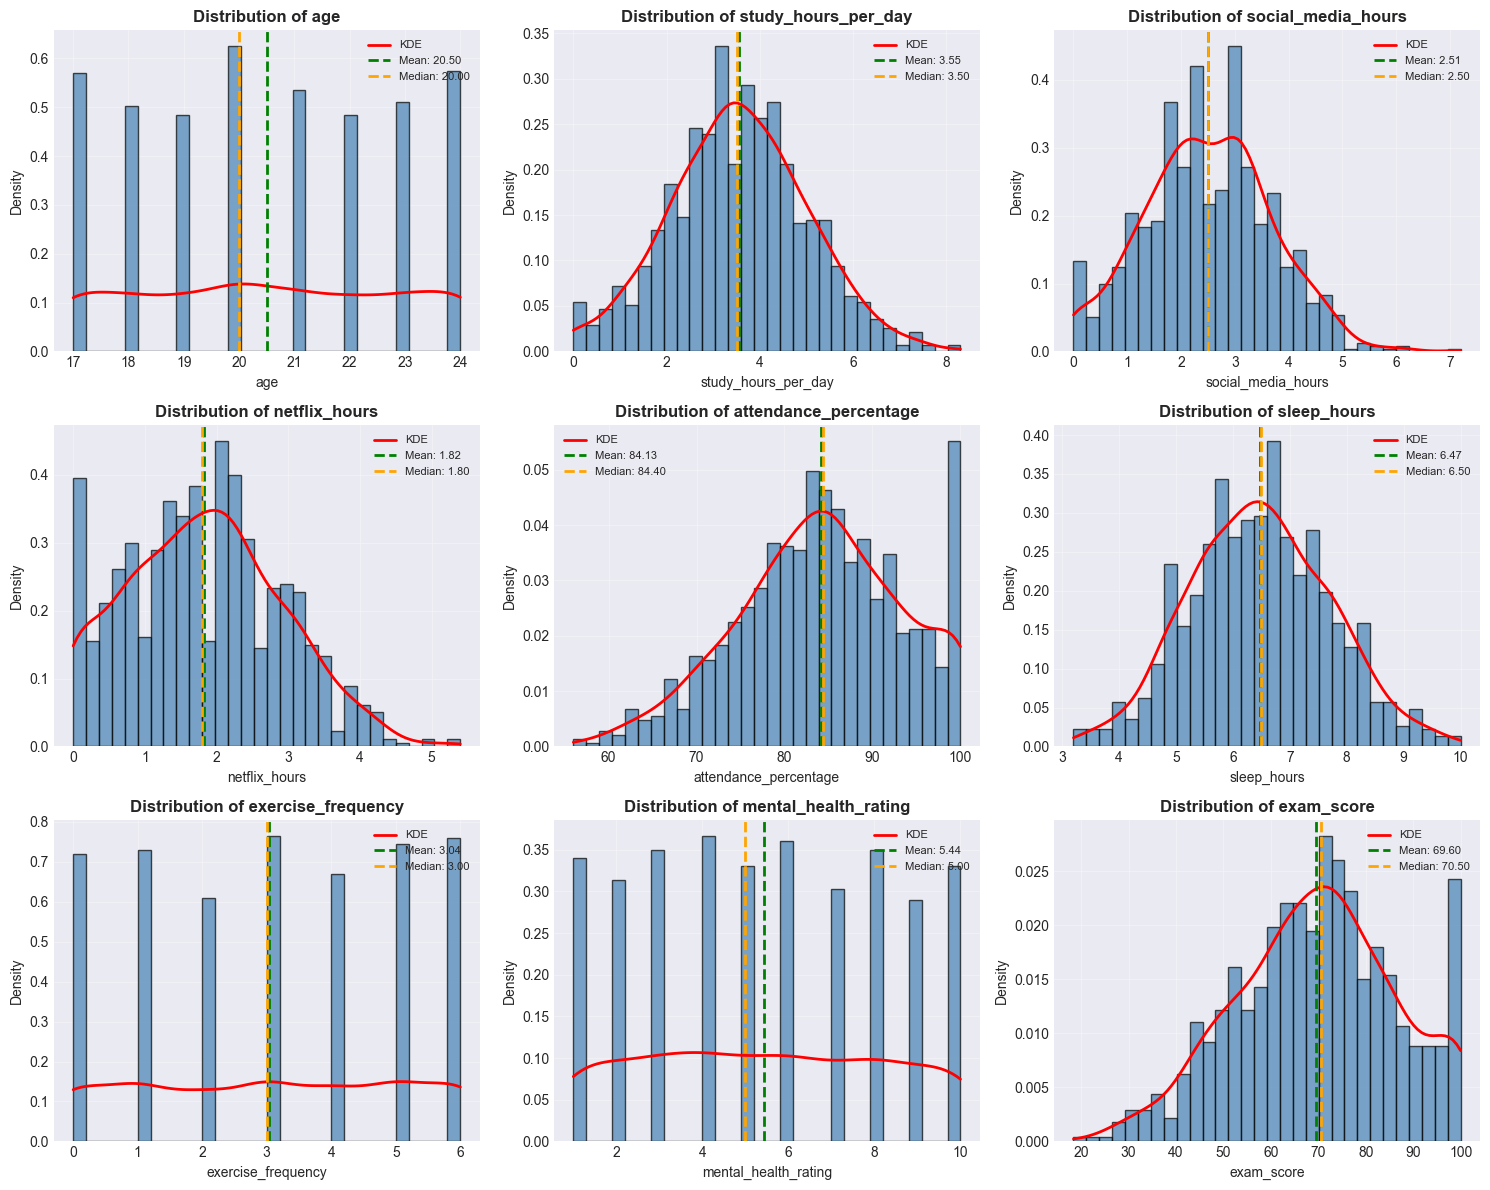

In [83]:
# Create histograms for all numeric variables
nVars = len(numericVars)
nCols = 3
nRows = (nVars + nCols - 1) // nCols

fig, axes = plt.subplots(nRows, nCols, figsize=(15, nRows * 4))
axes = axes.flatten() if nVars > 1 else [axes]

for idx, var in enumerate(numericVars):
    ax = axes[idx]
    
    # Plot histogram with KDE
    data = df[var].dropna()
    ax.hist(data, bins=30, alpha=0.7, color='steelblue', edgecolor='black', density=True)
    
    # Add KDE curve
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    xRange = np.linspace(data.min(), data.max(), 100)
    ax.plot(xRange, kde(xRange), 'r-', linewidth=2, label='KDE')
    
    # Add mean and median lines
    meanVal = data.mean()
    medianVal = data.median()
    ax.axvline(meanVal, color='green', linestyle='--', linewidth=2, label=f'Mean: {meanVal:.2f}')
    ax.axvline(medianVal, color='orange', linestyle='--', linewidth=2, label=f'Median: {medianVal:.2f}')
    
    ax.set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

# Remove extra subplots
for idx in range(nVars, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 6. Normality Tests

Using Shapiro-Wilk test to assess normality:
- H0: Data is normally distributed
- H1: Data is not normally distributed
- Significance level: α = 0.05

In [85]:
# Perform normality tests
normalityResults = []

for var in numericVars:
    data = df[var].dropna()
    
    # Shapiro-Wilk test
    stat, pValue = shapiro(data)
    
    # Interpretation
    isNormal = "Yes" if pValue > 0.05 else "No"
    
    normalityResults.append({
        'Variable': var,
        'Statistic': stat,
        'pValue': pValue,
        'Normal (α=0.05)': isNormal
    })

normalityDf = pd.DataFrame(normalityResults)

print("Shapiro-Wilk Normality Test Results:")
print(normalityDf.to_string(index=False))

Shapiro-Wilk Normality Test Results:
             Variable  Statistic       pValue Normal (α=0.05)
                  age   0.924860 6.177718e-22              No
  study_hours_per_day   0.997378 1.064707e-01             Yes
   social_media_hours   0.994266 7.275089e-04              No
        netflix_hours   0.982686 1.608654e-09              No
attendance_percentage   0.982607 1.502940e-09              No
          sleep_hours   0.997267 8.877598e-02             Yes
   exercise_frequency   0.913922 2.263751e-23              No
 mental_health_rating   0.938175 5.841297e-20              No
           exam_score   0.986919 8.675028e-08              No


## 7. Outlier Detection

Using boxplots and z-score method (values beyond ±3 SD).

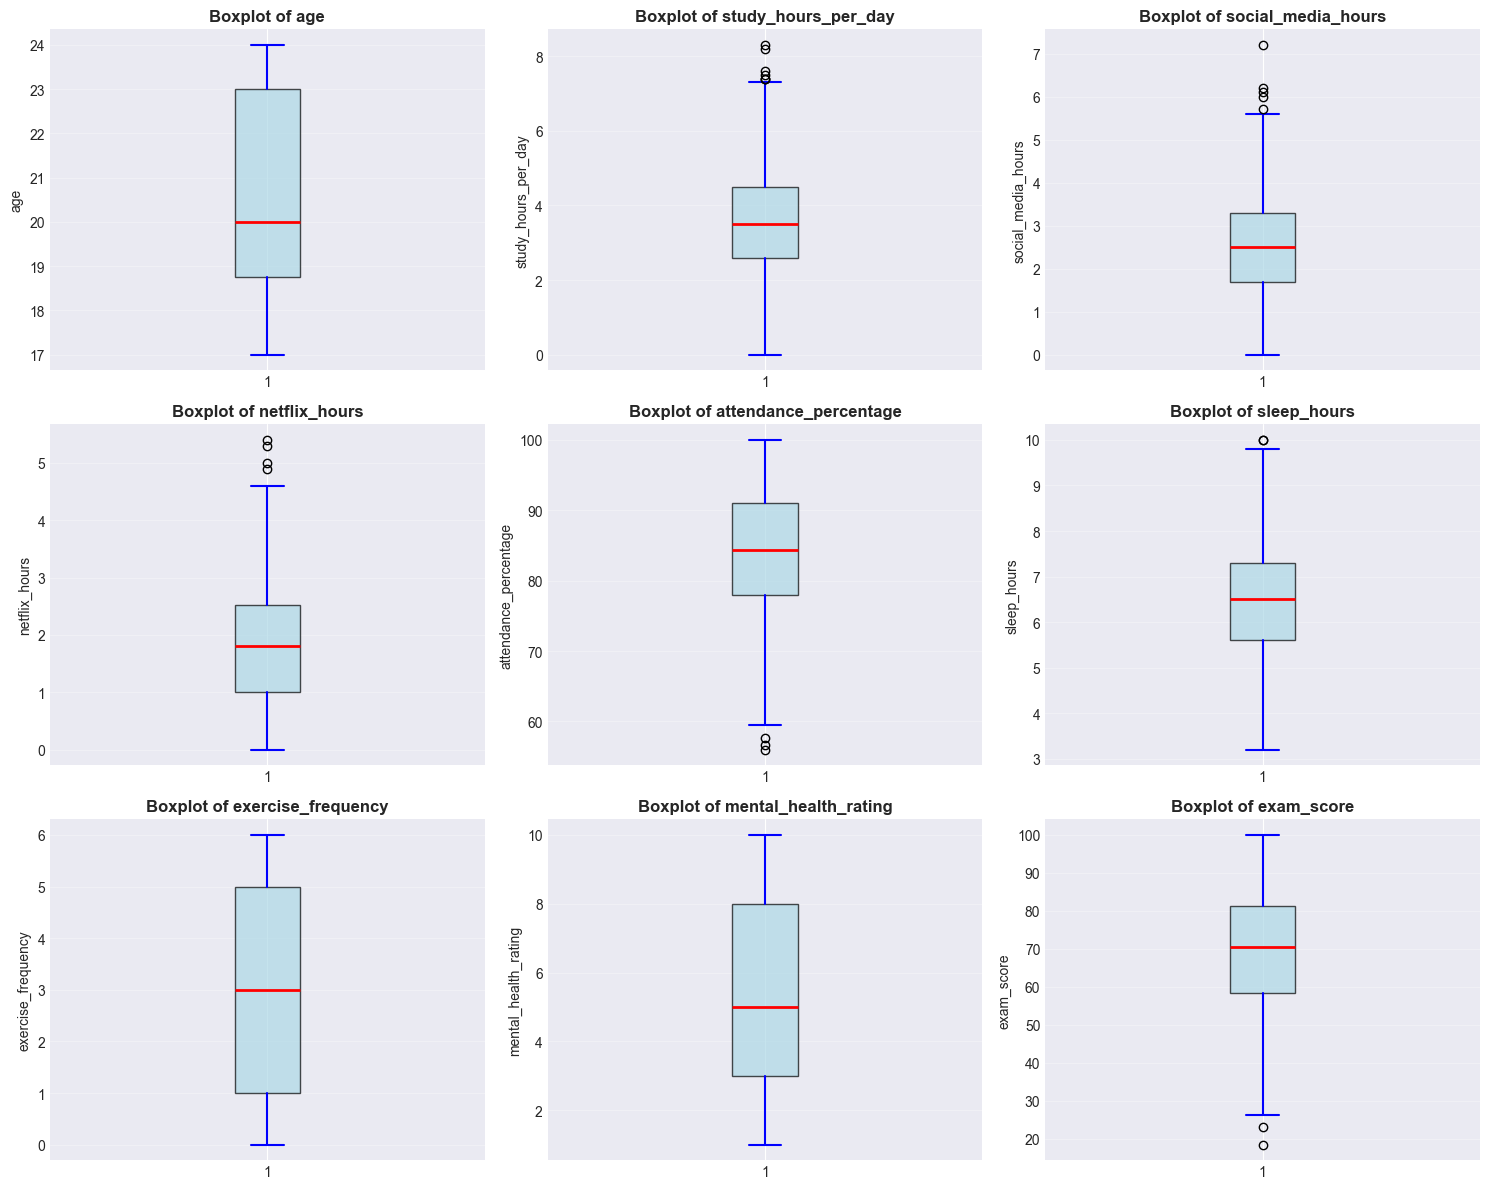

In [86]:
# Create boxplots for all numeric variables
nVars = len(numericVars)
nCols = 3
nRows = (nVars + nCols - 1) // nCols

fig, axes = plt.subplots(nRows, nCols, figsize=(15, nRows * 4))
axes = axes.flatten() if nVars > 1 else [axes]

for idx, var in enumerate(numericVars):
    ax = axes[idx]
    
    # Create boxplot
    bp = ax.boxplot(df[var].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='blue', linewidth=1.5),
                     capprops=dict(color='blue', linewidth=1.5))
    
    ax.set_title(f'Boxplot of {var}', fontsize=12, fontweight='bold')
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3, axis='y')

# Remove extra subplots
for idx in range(nVars, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [87]:
# Outlier detection using z-score method (±3 SD)
outlierSummary = []

for var in numericVars:
    data = df[var].dropna()
    zScores = np.abs((data - data.mean()) / data.std())
    outliers = data[zScores > 3]
    
    outlierSummary.append({
        'Variable': var,
        'totalObservations': len(data),
        'outliersCount': len(outliers),
        'outliersPercentage': (len(outliers) / len(data)) * 100
    })

outlierDf = pd.DataFrame(outlierSummary)

print("Outlier Detection Summary (Z-score > 3):")
print(outlierDf.to_string(index=False))
print("\nNote: Z-scores beyond ±3 SD are considered potential outliers.")

Outlier Detection Summary (Z-score > 3):
             Variable  totalObservations  outliersCount  outliersPercentage
                  age               1000              0                 0.0
  study_hours_per_day               1000              2                 0.2
   social_media_hours               1000              3                 0.3
        netflix_hours               1000              2                 0.2
attendance_percentage               1000              0                 0.0
          sleep_hours               1000              0                 0.0
   exercise_frequency               1000              0                 0.0
 mental_health_rating               1000              0                 0.0
           exam_score               1000              1                 0.1

Note: Z-scores beyond ±3 SD are considered potential outliers.


## 8. Categorical Variables Analysis

Frequency counts and percentages for categorical variables.

In [88]:
# Frequency analysis for categorical variables
for var in categoricalVars:
    print(f"\nFrequency Distribution: {var}")
    
    freqTable = df[var].value_counts()
    pctTable = df[var].value_counts(normalize=True) * 100
    
    result = pd.DataFrame({
        'Count': freqTable,
        'Percentage': pctTable
    })
    
    print(result.round(2))
    print(f"Total: {freqTable.sum()}")


Frequency Distribution: gender
        Count  Percentage
gender                   
Female    481        48.1
Male      477        47.7
Other      42         4.2
Total: 1000

Frequency Distribution: part_time_job
               Count  Percentage
part_time_job                   
No               785        78.5
Yes              215        21.5
Total: 1000

Frequency Distribution: diet_quality
              Count  Percentage
diet_quality                   
Fair            437        43.7
Good            378        37.8
Poor            185        18.5
Total: 1000

Frequency Distribution: parental_education_level
                          Count  Percentage
parental_education_level                   
High School                 392        39.2
Bachelor                    350        35.0
Master                      167        16.7
None                         91         9.1
Total: 1000

Frequency Distribution: internet_quality
                  Count  Percentage
internet_quality             

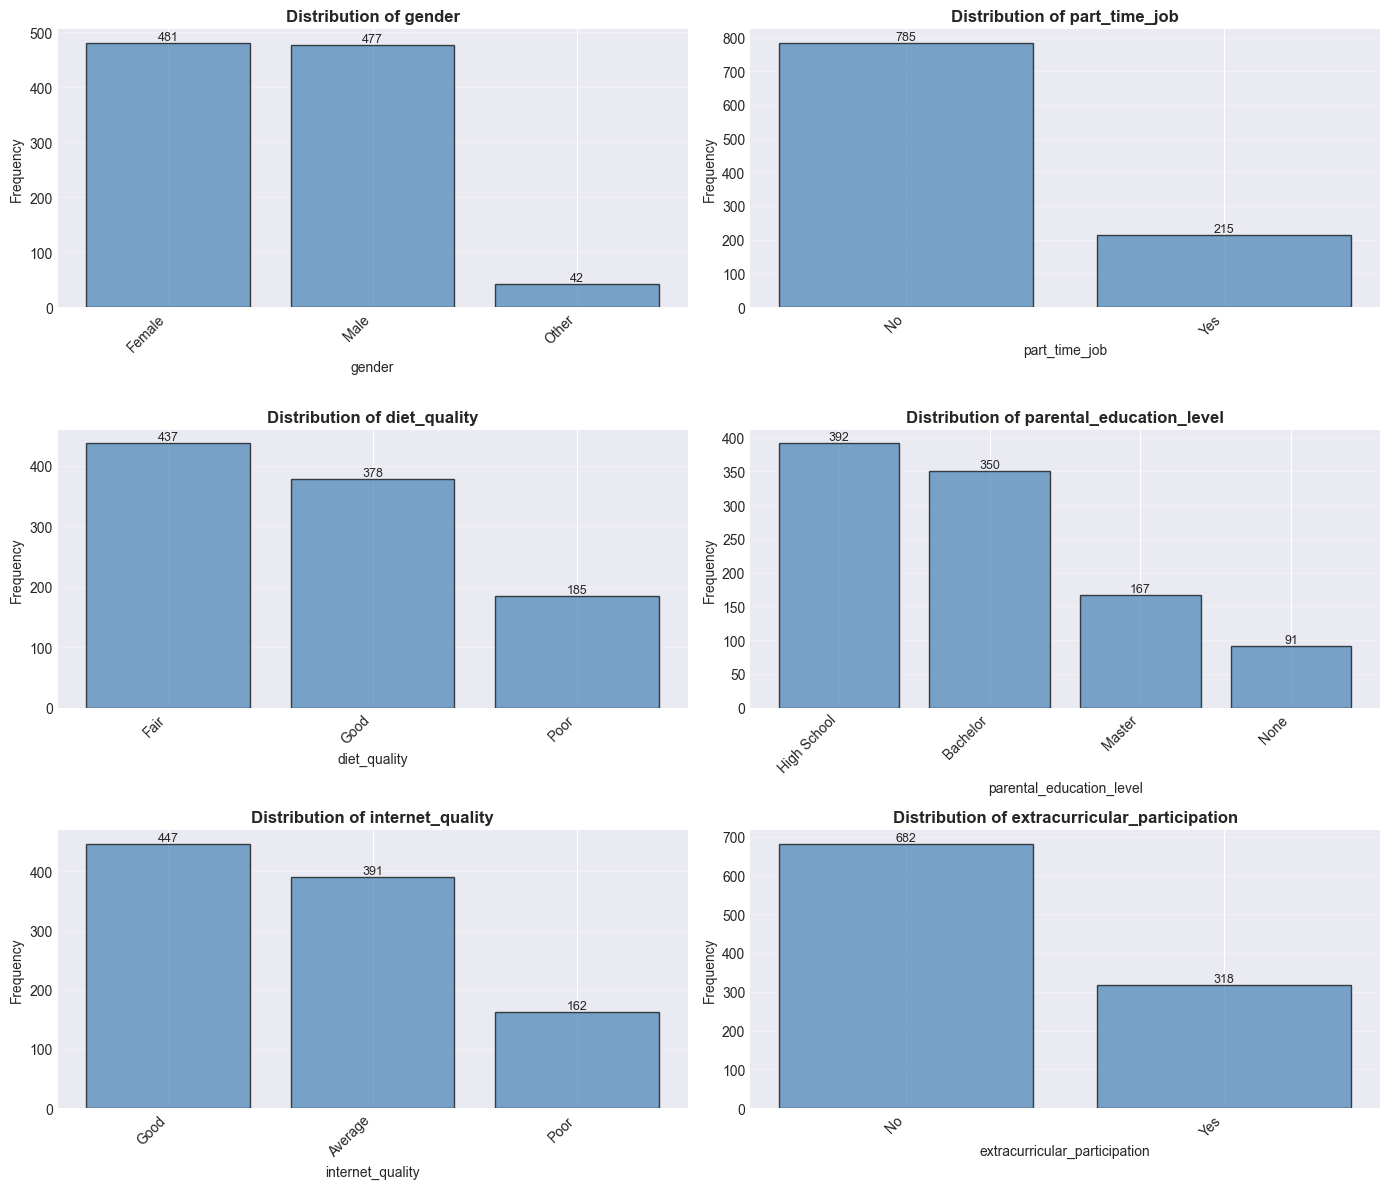

In [89]:
# Visualize categorical variables
nVars = len(categoricalVars)
if nVars > 0:
    nCols = 2
    nRows = (nVars + nCols - 1) // nCols

    fig, axes = plt.subplots(nRows, nCols, figsize=(14, nRows * 4))
    axes = axes.flatten() if nVars > 1 else [axes]

    for idx, var in enumerate(categoricalVars):
        ax = axes[idx]
        
        # Count values
        valueCounts = df[var].value_counts()
        
        # Create bar plot
        bars = ax.bar(range(len(valueCounts)), valueCounts.values, 
                      color='steelblue', alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(valueCounts)))
        ax.set_xticklabels(valueCounts.index, rotation=45, ha='right')
        ax.set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add count labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=9)

    # Remove extra subplots
    for idx in range(nVars, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()
else:
    print("No categorical variables to visualize.")

## 9. Correlation Analysis

Examining relationships between numeric variables using Pearson correlation.

In [90]:
# Calculate correlation matrix
correlationMatrix = df[numericVars].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlationMatrix.round(3))

Correlation Matrix:
                         age  study_hours_per_day  social_media_hours  \
age                    1.000                0.004              -0.009   
study_hours_per_day    0.004                1.000               0.020   
social_media_hours    -0.009                0.020               1.000   
netflix_hours         -0.001               -0.031               0.011   
attendance_percentage -0.026                0.026               0.040   
sleep_hours            0.037               -0.028               0.018   
exercise_frequency    -0.004               -0.029              -0.037   
mental_health_rating  -0.045               -0.004               0.001   
exam_score            -0.009                0.825              -0.167   

                       netflix_hours  attendance_percentage  sleep_hours  \
age                           -0.001                 -0.026        0.037   
study_hours_per_day           -0.031                  0.026       -0.028   
social_media_hours   

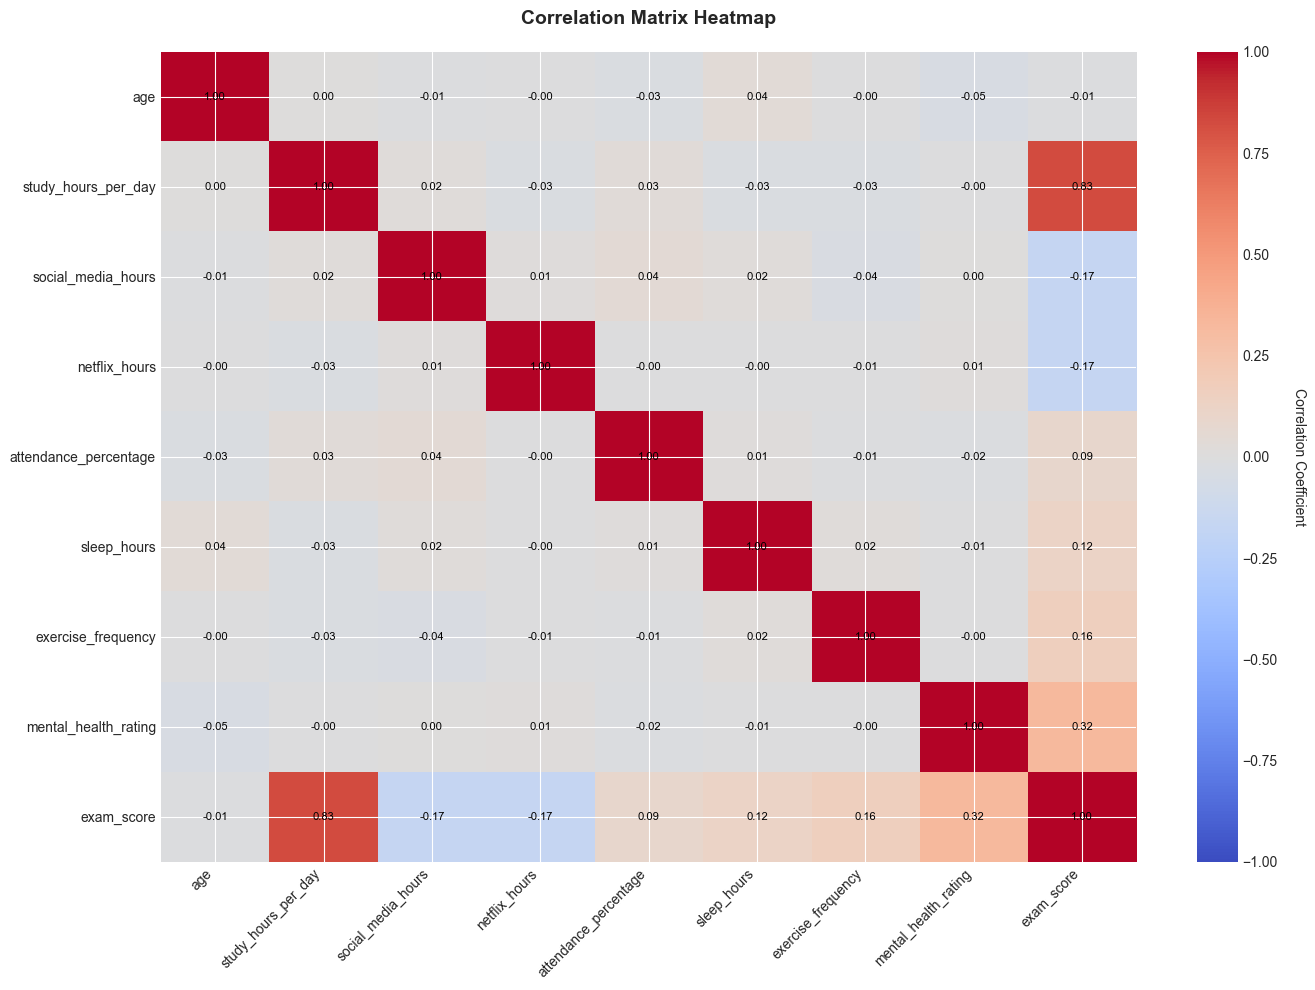

In [91]:
# Visualize correlation matrix as heatmap
fig, ax = plt.subplots(figsize=(14, 10))

# Create heatmap
im = ax.imshow(correlationMatrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Set ticks and labels
ax.set_xticks(range(len(correlationMatrix.columns)))
ax.set_yticks(range(len(correlationMatrix.columns)))
ax.set_xticklabels(correlationMatrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlationMatrix.columns)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# Add correlation values as text
for i in range(len(correlationMatrix)):
    for j in range(len(correlationMatrix)):
        text = ax.text(j, i, f'{correlationMatrix.iloc[i, j]:.2f}',
                      ha='center', va='center', color='black', fontsize=8)

ax.set_title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [92]:
# Find strongest correlations (excluding diagonal)
# Get upper triangle of correlation matrix
corrPairs = []
for i in range(len(correlationMatrix.columns)):
    for j in range(i+1, len(correlationMatrix.columns)):
        corrPairs.append({
            'variable1': correlationMatrix.columns[i],
            'variable2': correlationMatrix.columns[j],
            'correlation': correlationMatrix.iloc[i, j]
        })

corrDf = pd.DataFrame(corrPairs)
corrDf['absCorrelation'] = corrDf['correlation'].abs()
corrDf = corrDf.sort_values('absCorrelation', ascending=False)

print("\nTop 10 Strongest Correlations:")
print(corrDf.head(10)[['variable1', 'variable2', 'correlation']].to_string(index=False))


Top 10 Strongest Correlations:
            variable1             variable2  correlation
  study_hours_per_day            exam_score     0.825419
 mental_health_rating            exam_score     0.321523
        netflix_hours            exam_score    -0.171779
   social_media_hours            exam_score    -0.166733
   exercise_frequency            exam_score     0.160107
          sleep_hours            exam_score     0.121683
attendance_percentage            exam_score     0.089836
                  age  mental_health_rating    -0.045101
   social_media_hours attendance_percentage     0.040479
                  age           sleep_hours     0.037482


## 10. Variable Relationships with Target (exam_score)

Analyzing how each variable relates to the outcome variable.

Correlations with exam_score:
study_hours_per_day           :   0.825
mental_health_rating          :   0.322
exercise_frequency            :   0.160
sleep_hours                   :   0.122
attendance_percentage         :   0.090
age                           :  -0.009
social_media_hours            :  -0.167
netflix_hours                 :  -0.172


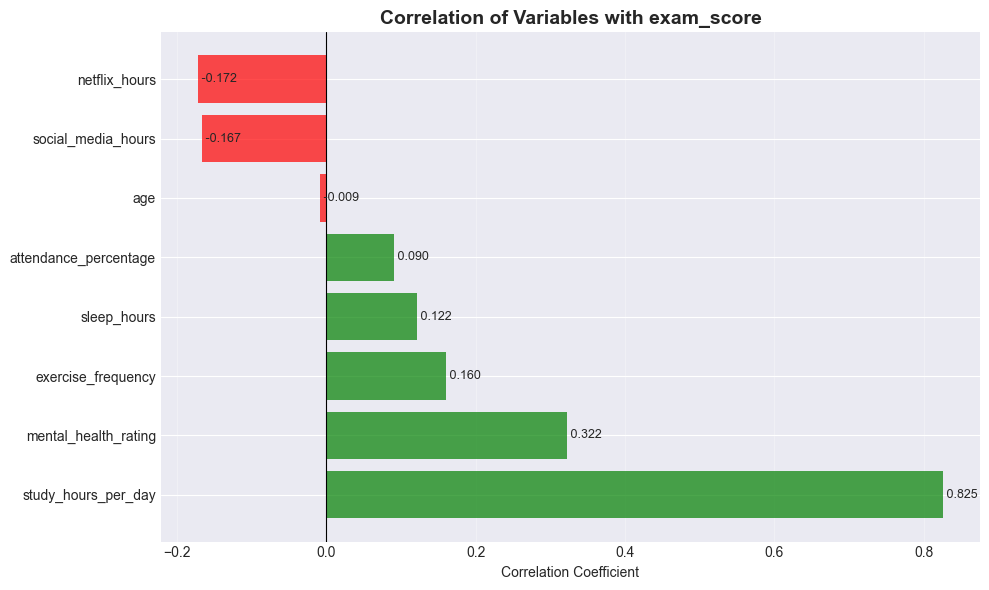

In [93]:
# Identify target variable
targetVar = 'exam_score'

if targetVar in numericVars:
    # Get correlations with target
    targetCorr = correlationMatrix[targetVar].drop(targetVar).sort_values(ascending=False)
    
    print(f"Correlations with {targetVar}:")
    for var, corr in targetCorr.items():
        print(f"{var:30s}: {corr:7.3f}")
    
    # Visualize correlations with target
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['green' if x > 0 else 'red' for x in targetCorr.values]
    bars = ax.barh(range(len(targetCorr)), targetCorr.values, color=colors, alpha=0.7)
    ax.set_yticks(range(len(targetCorr)))
    ax.set_yticklabels(targetCorr.index)
    ax.axvline(x=0, color='black', linewidth=0.8)
    ax.set_xlabel('Correlation Coefficient')
    ax.set_title(f'Correlation of Variables with {targetVar}', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (var, corr) in enumerate(targetCorr.items()):
        ax.text(corr, i, f' {corr:.3f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Target variable '{targetVar}' not found in numeric variables.")